# Vectorization: an introduction to universal functions

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In this notebook, you will learn about
- When and how to vectorize code
- Why this works: ufuncs
- Examples and applications

Consider the motion of a ball thrown from one person to another. The path of the ball is defined here as

- $x(t) = x_0 + v_x t$ the forward distance of the ball
- $y(t) = y_0 + v_y t - \frac{g}{2}t^2$ the height of the ball

where

- $x_0 = 0~m$ is the initial distance travelled
- $v_x$ is the initial forward speed of the ball
- $y_0$ is the initial height of the ball
- $v_y$ is the initial upward speed of the ball
- $g = 9.81~\frac{m}{s^2}$ is the acceleration due to gravity

Let's use NumPy to find all the locations where a 175-cm person can stand to catch a ball thrown from $x_0=0~m$ and $y_0=2~m$ high at $v_x = 3.5~m$ and $v_y = 4.5~m$. 

You will do this in five steps:

1. define your constants: $x_0,~v_x,~y_0,~v_y,~g$
2. define your independent variable, time, as a NumPy array
3. calculate the positions using time and your constants
4. plot the path of the ball
5. find the x-locations where $y(t)<0.175~m$

## 1. define your constants

First, define the variables that are constant in the functions, $x(t)$ and $y(t)$:

- $x_0$ as `x0`
- $y_0$ as `y0`
- $v_x$ as `vx`
- $v_y$ as `vy`
- $g$ as `g`

In [15]:
x0 = 0
y0 = 2

vx = 3.5
vy = 4.5
g = 9.81

## 2. Define your independent variable, time, as a NumPy array

Now, you will use a built-in NumPy function, [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) to create the independent variable $t$ as `time`. The function `np.linspace` uses three arguments to define an array, as such

```python
time = np.linspace(start, end, number_of_steps)
```

- the `start` creates the first value in the array `time`
- the `end` creates the last value in the array `time`
- the `number_of_steps` defines how many steps to take between `start` and `end`

In [24]:
time = np.linspace(0, 1, 21)

Consider the output from the array, `time`. Here you `print` some descriptions of how `np.linspace` defined your array. 

In [28]:
print('Your independent variable is time')
print('time starts at {} s and ends at {} s'.format(time[0], time[-1]))
print()
print('it has {} time steps and each step is {} s'.format(len(time), time[1] - time[0]))

Your independent variable is time
time starts at 0.0 s and ends at 1.0 s

it has 21 time steps and each step is 0.05 s


## 3. Calculate the positions using time and your constants

Now, that you have a NumPy array, you can plug it directly into equations to create new arrays. Next you define 

- `x` as $x(t) = x_0 + v_x t$ the forward distance of the ball
- `y` as $y(t) = y_0 + v_y t - \frac{g}{2}t^2$ the height of the ball

In [29]:
x = x0 + vx*time
y = y0 + vy*time -g/2*time**2

NumPy arrays make defining these functions straightforward. In the array `x`, each value of time [0, 0.05, ..., 1] s was multiplied by the initial speed, `vx`, then added to the initial position, `x0`. No need to create a `for`-loop and define each value of `x`. These operations are called [`ufunc`](https://numpy.org/doc/stable/reference/generated/numpy.ufunc.html) functions because they operate on each item in the array individually. It works any math operations e.g. 
- add: `+`
- subtract: `-`
- multiply: `*`
- divide: `/`
- powers: `**` e.g. squared: `**2`
- boolean operations e.g. `<`, `>`, `==`

NumPy has a number of other `ufunc` functions that operate on each element e.g. 
- sine and cosine: `np.sin` and `np.cos`
- exponential $e^x$: `np.exp(x)`
- logarithms $\log(x)$: `np.log(x)`


## 4. plot the path of the ball

Now, you have defined three arrays, `t`, `x`, and `y`. Each of these arrays is the same shape `(21, )`. 

In [36]:
print(np.shape(time))
print(np.shape(x))
print(np.shape(y))

(21,)
(21,)
(21,)


Because they are all the same shape, you can use [Matplotlib](https://matplotlib.org/stable/index.html) to see how the ball will travel through the air. Here, you use `plt.plot` to plot $y(t)$ vs $x(t)$. 

Text(0, 0.5, 'height (m)')

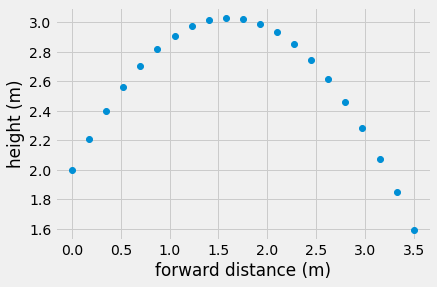

In [46]:
plt.plot(x, y, 'o')
plt.xlabel('forward distance (m)')
plt.ylabel('height (m)')

By plotting the path of the ball, notice how the height is over 2 meters for most of the time in the air. Somewhere past $x(t) = 3~m$ the ball is getting back to its original height of $2~m$. Next, you can find what those positions and times are. 

## 5. find the x-locations where $y(t)<0.175~m$

Now, you want to find the locations to stand _and even when to catch the ball_. You can use another `ufunc` function that operates on every element in the variable `y`. Use the `<` operator to check when $y(t) < 1.75~m$

In [47]:
y < 1.75

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True])

The result is a list of `True` and `False` statements. 
- If the value of `y` is more than $1.75~m$, then the result is `False` 
- If the value of `y` is less than $1.75~m$, then the result is `True`

Now, you can use this list of `True`/`False` statements to just look at the times and positions of the ball when the statement is `True`.

In [39]:
time[y < 1.75]

array([1.])

In [40]:
x[y < 1.75]

array([3.5])

In [42]:
y[y < 1.75]

array([1.595])

Text(0, 0.5, 'height (m)')

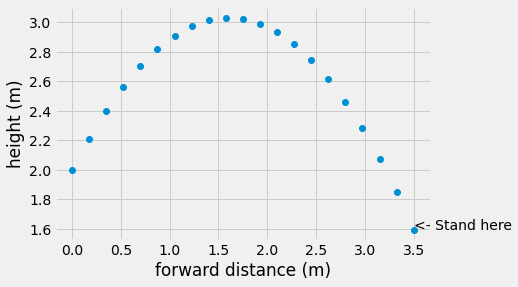

In [48]:
plt.plot(x, y, 'o')
plt.text(x[y < 1.75], y[y < 1.75], '<- Stand here')
plt.xlabel('forward distance (m)')
plt.ylabel('height (m)')

The result is that at $t = 1~s$, the ball has travelled $x(t=1) = 3.5~m$ and will be $y(t=1) = 1.595~m$ high. This is a great place to stand to catch the ball, just be ready!

## Read more
- [NumPy functions and methods overview](https://numpy.org/devdocs/user/quickstart.html#functions-and-methods-overview)
- [NumPy Quickstart guide](https://numpy.org/devdocs/user/quickstart.html)
- [NumPy for absolute beginners](https://numpy.org/devdocs/user/absolute_beginners.html)

## Exercises